In [9]:
import numpy as np
from numpy.random import randn
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
n = 200
a = np.linspace(0, np.pi, n // 2)
u = np.concatenate([np.cos(a) + 0.5, np.cos(a) - 0.5])
print(u.shape)

(200,)


In [7]:
np.random.randn(10,2)

array([[-0.96587114,  0.74245096],
       [-0.90489861,  2.6015945 ],
       [ 0.92913012,  0.86134942],
       [-2.61466074, -1.05275391],
       [-0.55942529, -0.04004966],
       [-1.6704202 , -0.35374769],
       [ 0.2469519 ,  0.0585429 ],
       [ 0.72991322,  0.70396594],
       [-0.66401022,  0.2599771 ],
       [-0.05587214, -1.70845784]])

In [14]:
def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return u, v, y

u, v, y = create_data(200)
print(y)

[[-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

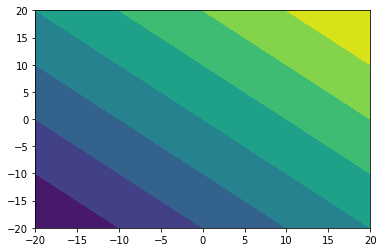

In [30]:
from matplotlib.colors import LogNorm

def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)
    
    
draw_contour()
plt.show()

In [38]:
a = np.array([[1,2], [3,4]])
p = (a[:, 0]**2 + a[:, 1]**2).reshape([2,1])
np.tile(p, 3)

array([[ 5,  5,  5],
       [25, 25, 25]])

In [49]:
def Kern(X, h=1):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    return np.exp(dist_matrix(X) / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


In [50]:
Kern(np.array([[1,2], [2,3]]))

array([[ 1.        ,  2.71828183],
       [ 2.71828183,  1.        ]])

In [51]:
dist_matrix(np.array([[1,2],[3,4]]))

array([[0, 8],
       [8, 0]])

In [53]:
a = np.array([3,7,6,1,2])
np.argsort(a)[:3]

array([3, 4, 0])

In [58]:
def laplacian_matrix(X, k=4):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(i, n):
            if is_mutually_k_nearest(dist, i, j, k):
                W[i, j] = 1.
                W[j, i] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


In [59]:
laplacian_matrix(np.array([[1,2], [3,5], [5,2], [4,5]]), k=2)

array([[ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.]])

In [63]:
w = np.arange(15).reshape(3, 5)
print(w)
print(np.diag(np.sum(w, axis=1)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[10  0  0]
 [ 0 35  0]
 [ 0  0 60]]


In [64]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [69]:
a = np.array([1,2])
tile_square(a[np.newaxis, :], 1).reshape(-1)

array([5])

In [71]:
np.sign([3,-2,6,-2.1])

array([ 1., -1.,  1., -1.])

In [79]:
print(u[0], u[y==-1])
print(v[-1], v[y==1])

[-16.17211817] [-16.17211817]
[ 0.79722616] [ 0.79722616]


In [85]:
def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(n, 2)
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


In [88]:
X, y = create_data(200)
print(X.shape, y.shape)

(200, 2) (200, 1)


In [97]:
print(X[(y!=0).reshape(-1)])



[[-13.90934655 -12.86716051]
 [ -0.39849652   1.26023128]]


In [98]:
x = np.array([1,2,3])
y = np.array([5,6,7])
np.array([x, y]).transpose((1,0))

array([[1, 5],
       [2, 6],
       [3, 7]])

In [99]:
np.concatenate([[1,2,3], [3,4,5]])

array([1, 2, 3, 3, 4, 5])

In [220]:
import numpy as np
from numpy.random import randn


def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(n, 2)
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    # You have to plt.show() after this function
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)


def kernel_matrix(X, cols, h=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    return np.exp(- dist_matrix(X)[:, :cols] / (2 * h**2))


def kern(x, train_X, h=1.):
    """
    x: [x[0], x[1]]
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    x_sq = np.tile(tile_square(x, 1), (1, train_X.shape[0]))
    X_sq = np.tile(tile_square(train_X, 1), (1, x.shape[0])).transpose((1, 0))
    dist = x_sq + X_sq - 2 * x @ train_X.T
    return np.exp(- dist / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    Returns: [[(x0 - x0)^2, (x0 - x1)^2, ...], ...]
    """
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


def weight_matrix(X, k=4):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(n):
            if is_mutually_k_nearest(dist, i, j, 4):
                W[i, j] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


def laplacian_matrix(X, k=4):
    W = weight_matrix(X, k)
    D = np.diag(np.sum(W, axis=1))
    return D - W


def estimate_theta(labeled_X, labels, unlabeled_X, lamb=1., nu=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    X = np.concatenate((labeled_X, unlabeled_X))
    K = kernel_matrix(X, labeled_X.shape[0])
    K_l = kernel_matrix(labeled_X, labeled_X.shape[0])
    L = laplacian_matrix(X)

    Q = K_l.T @ K_l + lamb * np.eye(labeled_X.shape[0]) + 2 * nu * K.T @ L @ K
    return np.linalg.inv(Q) @ K_l.T @ labels


def generate_classifier(theta, train_X):
    def classifier(X0, X1):
        """
        X0: [[p0, p1, ...], [...], ...]
        X1: [[q0, q1, ...], [...], ...]
        """
        X = np.array([X0, X1]).transpose((1, 2, 0)).reshape(-1, 2)
        kernels = kern(X, train_X)
        # print(kernels[:10])
        # print((kernels @ theta)[:10])
        signs = np.array(np.sign(kernels @ theta))
        print(signs.shape)
        reshaped = np.array(np.split(signs.reshape(-1), X0.shape[0]))
        print(reshaped.shape)
        return reshaped
    return classifier


def main():
    X, y = create_data(200)
    labeled_X = X[(y != 0).reshape(-1)]
    unlabeled_X = X[(y == 0).reshape(-1)]
    labels = y[(y != 0).reshape(-1)]
    t = estimate_theta(labeled_X, labels, unlabeled_X)
    classifier = generate_classifier(t, labeled_X)

    draw_contour(z_func=classifier)
    plt.plot(X[(y == 1).reshape(-1), 0], [X[(y == 1).reshape(-1), 1]], 'bo')
    plt.plot(X[(y == -1).reshape(-1), 0], [X[(y == -1).reshape(-1), 1]], 'rx')
    plt.plot(X[(y == 0).reshape(-1), 0], X[(y == 0).reshape(-1), 1])
    plt.show()


(10000, 1)
(100, 100)


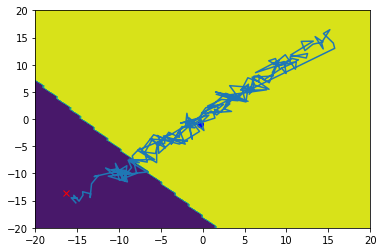

In [221]:
main()

In [188]:
np.sign(np.array([[-2.1, -3]]))

array([[-1., -1.]])

In [207]:
np.split([1,2,3,4,5,6], 3)

AttributeError: 'list' object has no attribute 'shape'

In [234]:
def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    print(u[:5])
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    print(v[:5])
    print(np.array([u, v]).reshape(2, n).transpose((1, 0)).shape)
    X = np.array([u, v]).reshape(2, n).transpose((1, 0))
    print(X[:5])
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


In [235]:
create_data(200)

[[-14.98711431]
 [-16.45554736]
 [-16.32382535]
 [-13.19303631]
 [-14.24838921]]
[[-0.35225428]
 [ 1.27085978]
 [ 1.84834079]
 [ 0.67239284]
 [ 2.62439319]]
(200, 2)
[[-14.98711431  -0.35225428]
 [-16.45554736   1.27085978]
 [-16.32382535   1.84834079]
 [-13.19303631   0.67239284]
 [-14.24838921   2.62439319]]


(array([[ -1.49871143e+01,  -3.52254284e-01],
        [ -1.64555474e+01,   1.27085978e+00],
        [ -1.63238254e+01,   1.84834079e+00],
        [ -1.31930363e+01,   6.72392845e-01],
        [ -1.42483892e+01,   2.62439319e+00],
        [ -1.43047698e+01,   5.12497882e-01],
        [ -1.45077290e+01,   3.65427283e+00],
        [ -1.51391552e+01,   1.67268774e+00],
        [ -1.51949278e+01,   1.90975183e+00],
        [ -1.45555268e+01,   1.26491313e+00],
        [ -1.48709267e+01,   2.72566747e+00],
        [ -1.51112077e+01,   3.35889030e+00],
        [ -1.39258751e+01,   3.39789246e+00],
        [ -1.62629501e+01,   3.47499648e+00],
        [ -1.33897219e+01,   3.13453319e+00],
        [ -1.34169140e+01,   5.20280795e+00],
        [ -1.31258778e+01,   4.70544804e+00],
        [ -1.58009024e+01,   4.14302299e+00],
        [ -1.37878343e+01,   4.67590627e+00],
        [ -1.14776766e+01,   6.85785693e+00],
        [ -1.39498002e+01,   3.89918147e+00],
        [ -1.33836824e+01,   4.339

In [242]:
import numpy as np
from numpy.random import randn


def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(2, n).transpose((1, 0))
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    # You have to plt.show() after this function
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)


def kernel_matrix(X, cols, h=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    return np.exp(- dist_matrix(X)[:, :cols] / (2 * h**2))


def kern(x, train_X, h=1.):
    """
    x: [x[0], x[1]]
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    x_sq = np.tile(tile_square(x, 1), (1, train_X.shape[0]))
    X_sq = np.tile(tile_square(train_X, 1), (1, x.shape[0])).transpose((1, 0))
    dist = x_sq + X_sq - 2 * x @ train_X.T
    return np.exp(- dist / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    Returns: [[(x0 - x0)^2, (x0 - x1)^2, ...], ...]
    """
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


def weight_matrix(X, k=10):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(n):
            if is_mutually_k_nearest(dist, i, j, 4):
                W[i, j] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


def laplacian_matrix(X, k=10):
    W = weight_matrix(X, k)
    D = np.diag(np.sum(W, axis=1))
    return D - W


def estimate_theta(labeled_X, labels, unlabeled_X, lamb=1., nu=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    X = np.concatenate((labeled_X, unlabeled_X))
    K = kernel_matrix(X, labeled_X.shape[0])
    K_l = kernel_matrix(labeled_X, labeled_X.shape[0])
    L = laplacian_matrix(X, 10)

    Q = K_l.T @ K_l + lamb * np.eye(labeled_X.shape[0]) + 2 * nu * K.T @ L @ K
    return np.linalg.inv(Q) @ K_l.T @ labels


def generate_classifier(theta, train_X):
    def classifier(X0, X1):
        """
        X0: [[p0, p1, ...], [...], ...]
        X1: [[q0, q1, ...], [...], ...]
        """
        X = np.array([X0, X1]).transpose((1, 2, 0)).reshape(-1, 2)
        kernels = kern(X, train_X)
        # print(kernels[:10])
        # print((kernels @ theta)[:10])
        signs = np.array(np.sign(kernels @ theta))
        print(signs.shape)
        reshaped = np.array(np.split(signs.reshape(-1), X0.shape[0]))
        print(reshaped.shape)
        return reshaped
    return classifier


def main():
    X, y = create_data(200)
    labeled_X = X[(y != 0).reshape(-1)]
    unlabeled_X = X[(y == 0).reshape(-1)]
    labels = y[(y != 0).reshape(-1)]
    t = estimate_theta(labeled_X, labels, unlabeled_X)
    classifier = generate_classifier(t, labeled_X)

    draw_contour(z_func=classifier)
    plt.plot(X[(y == 1).reshape(-1), 0], [X[(y == 1).reshape(-1), 1]], 'bo')
    plt.plot(X[(y == -1).reshape(-1), 0], [X[(y == -1).reshape(-1), 1]], 'rx')
    plt.plot(X[(y == 0).reshape(-1), 0], X[(y == 0).reshape(-1), 1], '.')
    plt.show()


(10000, 1)
(100, 100)


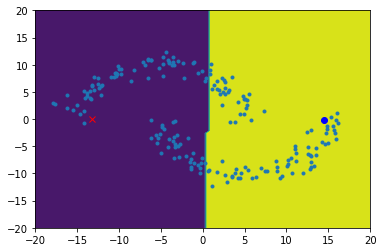

In [243]:
main()

In [246]:
np.sum(np.array([[1,2,3], [4,5,6]]), axis=1)

array([ 6, 15])

In [253]:
import numpy as np
from numpy.random import randn


def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(2, n).transpose((1, 0))
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    # You have to plt.show() after this function
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)


def kernel_matrix(X, cols, h=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    return np.exp(- dist_matrix(X)[:, :cols] / (2 * h**2))


def kern(x, train_X, h=1.):
    """
    x: [x[0], x[1]]
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    x_sq = np.tile(tile_square(x, 1), (1, train_X.shape[0]))
    X_sq = np.tile(tile_square(train_X, 1), (1, x.shape[0])).transpose((1, 0))
    dist = x_sq + X_sq - 2 * x @ train_X.T
    return np.exp(- dist / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    Returns: [[(x0 - x0)^2, (x0 - x1)^2, ...], ...]
    """
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


def weight_matrix(X, k=10):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(n):
            if is_mutually_k_nearest(dist, i, j, 4):
                W[i, j] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


def laplacian_matrix(X, k=10):
    W = weight_matrix(X, k)
    print(W[:5, :10])
    D = np.diag(np.sum(W, axis=1))
    # print(D[:5, :10])
    return D - W


def estimate_theta(labeled_X, labels, unlabeled_X, lamb=1., nu=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    X = np.concatenate((labeled_X, unlabeled_X))
    K = kernel_matrix(X, X.shape[0])
    K_l = kernel_matrix(labeled_X, X.shape[0])
    L = laplacian_matrix(X, 50)

    Q = K_l.T @ K_l + lamb * np.eye(labeled_X.shape[0]) + 2 * nu * K.T @ L @ K
    return np.linalg.inv(Q) @ K_l.T @ labels


def generate_classifier(theta, train_X):
    def classifier(X0, X1):
        """
        X0: [[p0, p1, ...], [...], ...]
        X1: [[q0, q1, ...], [...], ...]
        """
        X = np.array([X0, X1]).transpose((1, 2, 0)).reshape(-1, 2)
        kernels = kern(X, train_X)
        # print(kernels[:10])
        # print((kernels @ theta)[:10])
        signs = np.array(np.sign(kernels @ theta))
        print(signs.shape)
        reshaped = np.array(np.split(signs.reshape(-1), X0.shape[0]))
        print(reshaped.shape)
        return reshaped
    return classifier


def main():
    X, y = create_data(200)
    labeled_X = X[(y != 0).reshape(-1)]
    unlabeled_X = X[(y == 0).reshape(-1)]
    labels = y[(y != 0).reshape(-1)]
    t = estimate_theta(labeled_X, labels, unlabeled_X)
    classifier = generate_classifier(t, labeled_X)

    draw_contour(z_func=classifier)
    plt.plot(X[(y == 1).reshape(-1), 0], [X[(y == 1).reshape(-1), 1]], 'bo')
    plt.plot(X[(y == -1).reshape(-1), 0], [X[(y == -1).reshape(-1), 1]], 'rx')
    plt.plot(X[(y == 0).reshape(-1), 0], X[(y == 0).reshape(-1), 1], '.')
    plt.show()


In [254]:
main()

[[ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.]]


ValueError: operands could not be broadcast together with shapes (2,2) (200,200) 

In [275]:
import numpy as np
from numpy.random import randn


def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(2, n).transpose((1, 0))
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    # You have to plt.show() after this function
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)


def kernel_matrix(X, rows=None, h=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    if rows is None:
        return np.exp(- dist_matrix(X) / (2 * h**2))
    else:
        return np.exp(- dist_matrix(X)[:rows] / (2 * h**2))


def kern(x, train_X, h=1.):
    """
    x: [x[0], x[1]]
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    # x_sq = np.tile(tile_square(x, 1), (1, train_X.shape[0]))
    # X_sq = np.tile(tile_square(train_X, 1), (1, x.shape[0])).transpose((1, 0))
    x_sq = tile_square(x, train_X.shape[0])
    X_sq = tile_square(train_X, x.shape[0]).transpose((1, 0))
    dist = x_sq + X_sq - 2 * x @ train_X.T
    return np.exp(- dist / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    Returns: [[(x0 - x0)^2, (x0 - x1)^2, ...], ...]
    """
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


def weight_matrix(X, k=10):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(n):
            if is_mutually_k_nearest(dist, i, j, 4):
                W[i, j] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


def laplacian_matrix(X, k=10):
    W = weight_matrix(X, k)
    print(W[:5, :10])
    D = np.diag(np.sum(W, axis=1))
    # print(D[:5, :10])
    return D - W


def estimate_theta(labeled_X, labels, unlabeled_X, lamb=1., nu=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    X = np.concatenate((labeled_X, unlabeled_X))
    K = kernel_matrix(X)
    K_l = kernel_matrix(X, labeled_X.shape[0])
    L = laplacian_matrix(X, 100)

    Q = K_l.T @ K_l + lamb * np.eye(X.shape[0]) + 2 * nu * K.T @ L @ K
    return np.linalg.inv(Q) @ K_l.T @ labels


def generate_classifier(theta, train_X):
    def classifier(X0, X1):
        """
        X0: [[p0, p1, ...], [...], ...]
        X1: [[q0, q1, ...], [...], ...]
        """
        X = np.array([X0, X1]).transpose((1, 2, 0)).reshape(-1, 2)
        kernels = kern(X, train_X)
        # print(kernels[:10])
        # print((kernels @ theta)[:10])
        signs = np.array(np.sign(kernels @ theta))
        print(signs.shape)
        reshaped = np.array(np.split(signs.reshape(-1), X0.shape[0]))
        print(reshaped.shape)
        return reshaped
    return classifier


def main():
    X, y = create_data(200)
    labeled_X = X[(y != 0).reshape(-1)]
    unlabeled_X = X[(y == 0).reshape(-1)]
    labels = y[(y != 0).reshape(-1)]
    t = estimate_theta(labeled_X, labels, unlabeled_X)
    classifier = generate_classifier(t, X)

    draw_contour(z_func=classifier)
    plt.plot(X[(y == 1).reshape(-1), 0], [X[(y == 1).reshape(-1), 1]], 'bo')
    plt.plot(X[(y == -1).reshape(-1), 0], [X[(y == -1).reshape(-1), 1]], 'rx')
    plt.plot(X[(y == 0).reshape(-1), 0], X[(y == 0).reshape(-1), 1], '.')
    plt.show()


[[ 1.  0.  1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.  0.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.  1.  0.]]
(10000, 1)
(100, 100)


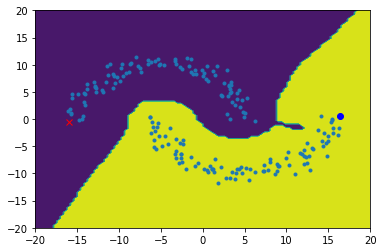

In [278]:
main()

In [308]:
import numpy as np
from numpy.random import seed, randn


def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(2, n).transpose((1, 0))
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    # You have to plt.show() after this function
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)


def kernel_matrix(X, rows=None, h=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    if rows is None:
        return np.exp(- dist_matrix(X) / (2 * h**2))
    else:
        return np.exp(- dist_matrix(X)[:rows] / (2 * h**2))


def kern(x, train_X, h=1.):
    """
    x: [x[0], x[1]]
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    # x_sq = np.tile(tile_square(x, 1), (1, train_X.shape[0]))
    # X_sq = np.tile(tile_square(train_X, 1), (1, x.shape[0])).transpose((1, 0))
    x_sq = tile_square(x, train_X.shape[0])
    X_sq = tile_square(train_X, x.shape[0]).transpose((1, 0))
    dist = x_sq + X_sq - 2 * x @ train_X.T
    return np.exp(- dist / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    Returns: [[(x0 - x0)^2, (x0 - x1)^2, ...], ...]
    """
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


def weight_matrix(X, k=10):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(i + 1, n):
            if is_mutually_k_nearest(dist, i, j, k):
                W[i, j] = 1.
                W[j, i] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


def laplacian_matrix(X, k=10):
    W = weight_matrix(X, k)
    D = np.diag(np.sum(W, axis=1))
    return D - W


def estimate_theta(labeled_X, labels, unlabeled_X, lamb=1., nu=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    X = np.concatenate((labeled_X, unlabeled_X))
    K = kernel_matrix(X)
    K_l = kernel_matrix(X, labeled_X.shape[0])
    L = laplacian_matrix(X, 2)

    Q = K_l.T @ K_l + lamb * np.eye(X.shape[0]) + 2 * nu * K.T @ L @ K
    return np.linalg.inv(Q) @ K_l.T @ labels


def generate_classifier(theta, train_X):
    def classifier(X0, X1):
        """
        X0: [[p0, p1, ...], [...], ...]
        X1: [[q0, q1, ...], [...], ...]
        """
        X = np.array([X0, X1]).transpose((1, 2, 0)).reshape(-1, 2)
        kernels = kern(X, train_X)
        signs = np.array(np.sign(kernels @ theta))
        reshaped = np.array(np.split(signs.reshape(-1), X0.shape[0]))
        return reshaped
    return classifier


def main():
    seed(2)
    X, y = create_data(200)
    labeled_X = X[(y != 0).reshape(-1)]
    unlabeled_X = X[(y == 0).reshape(-1)]
    labels = y[(y != 0).reshape(-1)]
    t = estimate_theta(labeled_X, labels, unlabeled_X)
    classifier = generate_classifier(t, X)

    draw_contour(z_func=classifier)
    plt.plot(X[(y == 1).reshape(-1), 0], [X[(y == 1).reshape(-1), 1]], 'bo')
    plt.plot(X[(y == -1).reshape(-1), 0], [X[(y == -1).reshape(-1), 1]], 'rx')
    plt.plot(X[(y == 0).reshape(-1), 0], X[(y == 0).reshape(-1), 1], '.')
    plt.show()


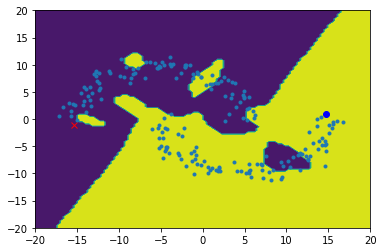

In [309]:
main()

In [310]:
np.split(np.array([1,2,3,4,5,6,7,8]), 4)

[array([1, 2]), array([3, 4]), array([5, 6]), array([7, 8])]

In [390]:
import numpy as np
from numpy.random import seed, randn


def create_data(n):
    points = np.linspace(0, np.pi, n // 2)
    u = - 10 * np.concatenate([np.cos(points) + 0.5, np.cos(points) - 0.5]).reshape(n, 1) + randn(n, 1)
    v = 10 * np.concatenate([np.sin(points), - np.sin(points)]).reshape(n, 1) + randn(n, 1)
    X = np.array([u, v]).reshape(2, n).transpose((1, 0))
    y = np.zeros((n, 1))
    y[0] = - 1
    y[-1] = 1
    return X, y


def draw_contour(axis_range=(-20, 20), granularity=100, z_func=lambda x, y: x + y):
    # You have to plt.show() after this function
    axis = np.linspace(*axis_range, granularity)
    X, Y = np.meshgrid(axis, axis)
    Z = z_func(X, Y)
    plt.contourf(X, Y, Z)


def kernel_matrix(X, rows=None, h=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    if rows is None:
        return np.exp(- dist_matrix(X) / (2 * h**2))
    else:
        return np.exp(- dist_matrix(X)[:rows] / (2 * h**2))


def kern(x, train_X, h=1.):
    """
    x: [x[0], x[1]]
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    # x_sq = np.tile(tile_square(x, 1), (1, train_X.shape[0]))
    # X_sq = np.tile(tile_square(train_X, 1), (1, x.shape[0])).transpose((1, 0))
    x_sq = tile_square(x, train_X.shape[0])
    X_sq = tile_square(train_X, x.shape[0]).transpose((1, 0))
    dist = x_sq + X_sq - 2 * x @ train_X.T
    return np.exp(- dist / (2 * h**2))


def tile_square(X, cols):
    """
    Align X^2 colum-wise
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    sq = np.square(X[:, 0]) + np.square(X[:, 1])
    sq = sq.reshape([X.shape[0], 1])
    return np.tile(sq, cols)


def dist_matrix(X):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    Returns: [[(x0 - x0)^2, (x0 - x1)^2, ...], ...]
    """
    sq = tile_square(X, X.shape[0])
    return sq + sq.T - 2 * X @ X.T


def weight_matrix(X, k=10):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    k: k nearest neighbor
    """
    n = X.shape[0]
    W = np.zeros((n, n))
    dist = dist_matrix(X)
    for i in range(n):
        for j in range(i + 1, n):
            if is_mutually_k_nearest(dist, i, j, k):
                W[i, j] = 1.
                W[j, i] = 1.
    return W


def is_mutually_k_nearest(dist_matrix, i: int, j: int, k: int):
    """
    dist_matrix: [[d(x0, x0), (x0, x1), ...], [d(x1, x0), (x1, x1), ...], ...]
    """
    # Is j k-nearest-neighbour of i ?
    dist_from_i = dist_matrix[i]
    k_nearest_idxes = np.argsort(dist_from_i)[:k + 1]
    if j not in k_nearest_idxes:
        return False
    # Is i k-nearest-neighbour of j ?
    dist_from_j = dist_matrix[j]
    k_nearest_idxes = np.argsort(dist_from_j)[:k + 1]
    if i not in k_nearest_idxes:
        return False
    return True


def laplacian_matrix(X, k=10):
    W = weight_matrix(X, k)
    D = np.diag(np.sum(W, axis=1))
    return D - W


def estimate_theta(labeled_X, labels, unlabeled_X, k=2, lamb=1., nu=1.):
    """
    X: [(x0[0], x0[1]), (x1[0], x1[1]), ...]
    """
    X = np.concatenate((labeled_X, unlabeled_X))
    K = kernel_matrix(X)
    K_l = kernel_matrix(X, labeled_X.shape[0])
    L = laplacian_matrix(X, k)

    Q = K_l.T @ K_l + lamb * np.eye(X.shape[0]) + 2 * nu * K.T @ L @ K
    return np.linalg.inv(Q) @ K_l.T @ labels


def generate_classifier(theta, train_X):
    def classifier(X0, X1):
        """
        X0: [[p0, p1, ...], [...], ...]
        X1: [[q0, q1, ...], [...], ...]
        """
        X = np.array([X0, X1]).transpose((1, 2, 0)).reshape(-1, 2)
        kernels = kern(X, train_X)
        signs = np.array(np.sign(kernels @ theta))
        reshaped = np.array(np.split(signs.reshape(-1), X0.shape[0]))
        return reshaped
    return classifier


def main():
    seed(42)
    X, y = create_data(200)
    labeled_X = X[(y != 0).reshape(-1)]
    unlabeled_X = X[(y == 0).reshape(-1)]
    labels = y[(y != 0).reshape(-1)]
    t = estimate_theta(labeled_X, labels, unlabeled_X, 2, 10.)
    classifier = generate_classifier(t, X)
    
    print(classifier(np.array([[-20]]), np.array([[1]])))
    print(classifier(np.array([[-20]]), np.array([[5]])))

    draw_contour(granularity=500, z_func=classifier)
    plt.plot(X[(y == 1).reshape(-1), 0], [X[(y == 1).reshape(-1), 1]], 'bo')
    plt.plot(X[(y == -1).reshape(-1), 0], [X[(y == -1).reshape(-1), 1]], 'rx')
    plt.plot(X[(y == 0).reshape(-1), 0], X[(y == 0).reshape(-1), 1], '.')
    plt.show()


[[ 1.]]
[[-1.]]


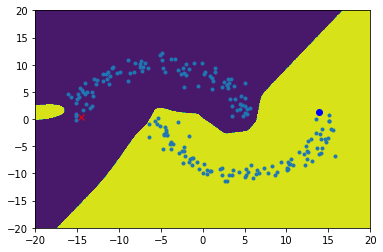

In [391]:
main()